# WeRateDogs Project - Wrangle & Analyze Twitter Data

By Nagashri Nagaraj<br>
Date November 13 2018

## Introduction:
Goal of this project is to wrangle and analyze @WeRateDogs Twitter data thru' web scraping using Tweepy API, Requests library, downloading csv for gathering data. Then assess and clean the data to create interesting and trustworthy analyses and visualizations. 

## Gathering Data:
1. Download the given csv file manually: twitter_archive_enhanced.csv<br>
2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv<br>
3. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.<br>

In [100]:
#import libraries

import numpy as np
import pandas as pd
import os # to download files from Udacity server
import requests # to download files from Udacity server
import tweepy 
import json
from tqdm import *
import datetime as dt
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Read twitter-archive-enhanced.csv and store it as dataframe variable archive

archive = pd.read_csv("data/twitter-archive-enhanced.csv")


In [4]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:

# Programatically download image prediction file from Udacity server using Requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save data
with open('data/image-predictions.tsv', "wb") as file: 
    file.write(response.content)
    
# Import data
df_breeds = pd.read_csv('data/image-predictions.tsv', sep = "\t")

df_breeds.sample(2)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
922,702217446468493312,https://pbs.twimg.com/media/Cb7HCMkWEAAV9zY.jpg,1,golden_retriever,0.242419,True,chow,0.226800,True,cocker_spaniel,0.194086,True
614,680161097740095489,https://pbs.twimg.com/media/CXBq6RPWkAAaNuU.jpg,1,bluetick,0.268681,True,miniature_pinscher,0.125652,True,English_setter,0.089373,True


# DO NOT TOUCH - START

Consumer API keys KJ4snTTqprVl13xESdynv0FLD (API key)

2I8tD942i78jbYOmttOrarGfnHJwSCDct6V3611el6to5AJyt8 (API secret key)

755364732-Qeb0twZzwoOHSwdjy2WNEO6V9SxVjs9rjfylXSeV (Access token)

uXwh7cRrVOwzHOa9d9bXCjzI63tiXgLM98rGjqm62h5tO (Access token secret)

https://developer.twitter.com/en/apps/15941238

In [8]:
# Import data from Twitter API

# authentication pieces
consumer_key = "KJ4snTTqprVl13xESdynv0FLD"
consumer_secret = "2I8tD942i78jbYOmttOrarGfnHJwSCDct6V3611el6to5AJyt8"
access_token = "755364732-Qeb0twZzwoOHSwdjy2WNEO6V9SxVjs9rjfylXSeV"
access_secret = "uXwh7cRrVOwzHOa9d9bXCjzI63tiXgLM98rGjqm62h5tO"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# Create connection to API
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

# Create list of twitter ids
tweet_ids = archive["tweet_id"].astype(list)


In [25]:
# Download tweepy status object based on tweet_id in archive and store it in a list.
tweets_data = []

# Tweets that can't be found for the tweet_ids are saved in the list below
failed_ids = []

for tweet_id in tqdm(tweet_ids):
    try:
        tweets_data.append(api.get_status(tweet_id))
    except Exception as e:
        failed_ids.append(tweet_id)

100%|██████████| 2356/2356 [37:32<00:00,  4.32it/s]    


In [26]:
print("The list of tweets" ,len(tweets_data))
print("The list of tweets no found" , len(failed_ids))

The list of tweets 2340
The list of tweets no found 16


In [27]:
#Then in this code block we isolate the json part of each tweepy 
#status object that we have downloaded and we add them all into a list

my_list_of_dicts = []
for each_json_tweet in tweets_data:
    my_list_of_dicts.append(each_json_tweet)

In [55]:
#print(my_list_of_dicts[0:1])

In [44]:
# Read text file my_list_of_dicts line by line into a txt file:

with open('data/tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [100]:
my_list = []
with open('data/tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'
        my_list.append({'tweet_id': str(tweet_id),
                             'whole_tweet': str(whole_tweet),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'text': text,
                             'retweeted_status': retweeted_status,
                            })
        df_json = pd.DataFrame(my_list, columns = ['tweet_id', 'whole_tweet','favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])                    

In [111]:
df_json1 = df_json.to_csv('data/df_json1.csv')

# DO NOT TOUCH - END

In [26]:
df_json1 = pd.read_csv('data/df_json1.csv')

In [27]:
# Copy dataframes for assessment and cleaning

archive_clean = archive.copy()
df_breeds_clean = df_breeds.copy()
df_json1_clean = df_json1.copy()

# Visual Assessment

In [28]:
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [29]:
df_breeds_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [30]:
df_json1_clean

,Unnamed: 0,tweet_id,whole_tweet,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,38257,8381,7437146,10,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,1,892177421306343426,This is Tilly. She's just checking pup on you....,32797,6188,7437146,10,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,24696,4094,7437146,10,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,3,891689557279858688,This is Darla. She commenced a snooze mid meal...,41584,8522,7437146,10,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,4,891327558926688256,This is Franklin. He would like you to stop ca...,39765,9232,7437146,10,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,5,891087950875897856,Here we have a majestic great white breaching ...,19956,3070,7437146,10,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,11681,2038,7437146,10,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,7,890729181411237888,When you watch your owner call another dog a g...,64577,18611,7437146,10,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,8,890609185150312448,This is Zoey. She doesn't want to be one of th...,27431,4213,7437146,10,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,9,890240255349198849,This is Cassie. She is a college pup. Studying...,31482,7279,7437146,10,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


#### Visual Assessment Quality Issues:
<ol>
    <li>Some ids did not work in twitter API</li>
    <li>df_json1_clean contains columns with redundant information: "source", "expanded_urls"</li>
    <li>Dog names & stages in archive_clean do not always map properly to their respective columns</li>
</ol>    

# Programatic Assessment

In [31]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [32]:
# Check if there are any duplicate tweet_id
sum(archive['tweet_id'].duplicated())

0

In [33]:
# Number of rows where dogs are not categorised as doggo, floofer, pupper and puppo 
sum(archive['doggo' and 'floofer' and 'pupper' and 'puppo'] == 'None')

2326

### Issues in archive_clean

#### Quality Issue:
<ol>
    <li>Number of posts are retweets which do not follow standard procedure of posting</li>
    <li>tweet_id a categorical value is labeled as integer</li>
    <li>There are 2326 rows where all the dog state are set to 'None' value. So we will be left with 30 rows to categorize. Hence, these columns cannot be used in analysis</li>
</ol>
    
#### Tidy Issue:
<ol>
    <li>Doggo, floffer, pupper, puppo can be collapsed to one column 'dog_type'</li>
</ol>
    

In [34]:
df_breeds_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [35]:
# Check algorithm's successful prediction 
print(df_breeds.p1_dog.value_counts())
print(df_breeds.p2_dog.value_counts())
print(df_breeds.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


Looks like the algorithm is prety successful predicting the dog breeds from its image

In [36]:
df_breeds.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [37]:

# Number of instances where algorithm has predicted the image is not of a dog
sum(df_breeds['p1_dog' and 'p2_dog' and 'p3_dog'] == False)


576

Since algorithm is relatively good in predicting, we can remove these 576 rows.

In [38]:
# Number of instances where algorithm has identified the image as dog in all three predictions
sum(df_breeds['p1_dog' and 'p2_dog' and 'p3_dog'] == True)

1499

In [39]:
# Checking selection when the 2nd or 3rd probabilities are dogs
sum((df_breeds["p1_dog"] == False) & ((df_breeds["p2_dog"] == True) | (df_breeds["p3_dog"] == True)))       

219

There are 219 instances where the algorithm has recognised the image as dog in 2nd or 3rd prediction

In [40]:
df_breeds[(df_breeds["p1_dog"] == False) & ((df_breeds["p2_dog"] == True) | (df_breeds["p3_dog"] == True))]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False
87,667524857454854144,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,hare,0.447893,False,dhole,0.092435,False,Chesapeake_Bay_retriever,0.088122,True
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
103,667806454573760512,https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg,1,toyshop,0.253089,False,Chihuahua,0.187155,True,Brabancon_griffon,0.112799,True
108,667878741721415682,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,1,seat_belt,0.200373,False,miniature_pinscher,0.106003,True,schipperke,0.104733,True
113,667915453470232577,https://pbs.twimg.com/media/CUTpj-GWcAATc6A.jpg,1,leatherback_turtle,0.452517,False,boxer,0.196655,True,terrapin,0.160983,False


If the picture is recognised to have a dog with more than a 0.25 rating, then there is a decent probability that it has a dog.


### Issues in df_breeds

#### Comments:
<ol>
    <li>No missing entries were found in the dataframe</li>
    <li>Most columns have appropriate data types</li>
</ol>

#### Attributes:
<ol>
    <li>tweet_id: id of tweet</li>
    <li>jpg_url: web address of the image</li>
    <li>img_num:  image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).</li>
    <li>p1, p2, p3: Algorithm's 1st, 2nd and 3rd most likely prediction</li>
    <li>p1_conf, p2_conf, p3_conf: Algorithm's confidence level of prediction in decending order</li>
    <li>p1_dog, p2_dog, p3_dog: Weather or not 1st, 2nd, 3rd prediction is a breed of dog</li>
</ol>

#### Quality Issue:
<ol>
    <li>'img_num' does not provide useful information</li>
    <li>tweet_id is a categorical value but is labeled as an integer </li>
</ol>


In [41]:
df_json1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 10 columns):
Unnamed: 0          2340 non-null int64
tweet_id            2340 non-null int64
whole_tweet         2340 non-null object
favorite_count      2340 non-null int64
retweet_count       2340 non-null int64
followers_count     2340 non-null int64
friends_count       2340 non-null int64
source              2340 non-null object
retweeted_status    2340 non-null object
url                 2340 non-null object
dtypes: int64(6), object(4)
memory usage: 182.9+ KB


### Issues in df_json1_clean

#### Comments:
<ol>
    <li>No missing data in the dataframe</li>
</ol>

#### Attributes:
<ol>
    <li>tweet_id: id of tweet</li>
    <li>whole_tweet: entire tweet</li>
    <li>favorite_count: Number of times tweet has been favorated</li>
    <li>retweet_count: Number of times tweet has been retweeted</li>
    <li>followers_count: Number of followers</li>
    <li>friends_count: Number of friends</li>
    <li>source: source eg - phone/computer</li>
    <li>retweeted_status: original tweet or retweet</li>
    <li>url: web address for the tweet</li>
</ol>


# Assessment Summary

### Quality
<ul>
    <li>Some ids did not work using the twitter API, indicating tweet_ids might not be consistent across dataframes</li>
    <li>"img_num" in df_breeds does not provide any new information</li>
    <li>tweets in df_breeds does not always contain dogs and when they do, they are not categorised properly</li>
    <li>Columns does not have appropriate data types</li>
    <li>Columns like "source" and "expanded_urls" in archive are not useful</li>
    <li>Numerators and denominators in df_json1 does not always map properly to their respective columns.</li>
    <li>"text" column in archive dataframe contains shortened url to the tweet</li>
    <li>Although it looks as if the dog state is complete, there are strings set to "None", which shows that these columns are far more empty than would otherwise be indicated</li>
    <li>Number of posts in df_json1 are retweets, which do not follow the standard procedure of posting</li>   
</ul>    

### Tidiness
<ul>
    <li>Doggo, floffer, pupper, puppo can be collapsed to one column 'dog_type'</li>
    <li>df_json1 and archive both contains information about tweets</li>
</ul>    

# Data Cleaning

In [42]:
df_archive_Clean = archive_clean.copy()
df_breeds_Clean = df_breeds_clean.copy()
df_json1_Clean = df_json1_clean.copy()

## Issue 1. Text column in df_archive_Clean contains the shortened URL to the tweet

### Issue 1: Define and Code:

In [43]:
"""
1. Remove url at the end of 'text' column in archive_Clean dataframe
"""
# Find the length of url
length_of_url = len(df_archive_Clean['text'][0].split()[-1])+1
length_of_url

# Remove length of url from the column
df_archive_Clean['text'] = df_archive_Clean['text'].apply(lambda row: row[:-length_of_url])


## Issue 1: Test

In [44]:
if len(archive.text[0]) - len(df_archive_Clean.text[0]) == length_of_url:
    print("URL successfully deleted")

URL successfully deleted


## Issue 2. df_archive_Clean contains rows that are retweets or responses

### Issue 2: Define and Code:

In [45]:
#CODE: Delete retweets by filtering the NaN of retweeted_status_user_id
df_archive_Clean = df_archive_Clean[pd.isnull(df_archive_Clean['retweeted_status_user_id'])]

## Issue 2: Test

In [46]:
if sum(df_archive_Clean.retweeted_status_user_id.value_counts())== 0:
    print("Columns successfully deleted")

Columns successfully deleted


## Issue 3. df_archive_Clean contains useless columns 

### Issue 3: Define and Code:

In [47]:
"""
3. Delete columns that are not used for analysis
"""
# get the column names of twitter_archive_clean
print(list(df_archive_Clean))

# Delete columns not needed
remove_cols_info = ["source", "expanded_urls", "doggo", "floofer", "pupper", "puppo",
                   "in_reply_to_status_id", "in_reply_to_user_id", 
                   "retweeted_status_id", "retweeted_status_user_id", 
                    "retweeted_status_timestamp"]

df_archive_Clean.drop(columns=remove_cols_info, inplace=True)

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


## Issue 3: Test

In [48]:
#TEST
try: 
    df_archive_Clean[remove_cols_info]
except KeyError: 
    print("Columns successfully deleted")

Columns successfully deleted


## Issue 4. df_breeds_Clean useless column 'img_num'

### Issue 4: Define and Code:

In [49]:
"""
4. Remove column "img_num" from df_breeds_Clean
"""
df_breeds_Clean.drop(columns = ("img_num"), inplace = True)   

## Issue 4: Test

In [50]:
try: 
    df_breeds_Clean["img_num"]
except KeyError: 
    print("Columns successfully deleted")

Columns successfully deleted


## Issue 5. 

### Issue 5: Define and Code:

In [51]:
"""
5. Remove rows in df_breeds_Clean where:
    * All probabilities of p_dog are False
    * The Probabilities of p2_conf and p2_dog are lower than 0.2
"""
# Find indexes of pictures not of dogs
not_dog = df_breeds_Clean[(df_breeds_Clean["p1_dog"] == False) &
         (df_breeds_Clean["p2_dog"] == False) &
         (df_breeds_Clean["p3_dog"] == False)]["tweet_id"].index

# Find indexes of pictures that are unlikely to be dogs
unlikely_dog = df_breeds_clean[(df_breeds_Clean["p1_dog"] == False) &
         (df_breeds_Clean["p2_conf"] < 0.2) &
         (df_breeds_Clean["p3_conf"] < 0.2)]["tweet_id"].index

# Put both series into the same variable
remove_row = not_dog.append(unlikely_dog)

df_breeds_Clean.drop(remove_row, inplace=True)

## Issue 5: Test

In [52]:
# Check certain not dogs
assert len(df_breeds_Clean[(df_breeds_Clean["p1_dog"] == False) &
     (df_breeds_Clean["p2_dog"] == False) &
     (df_breeds_Clean["p3_dog"] == False)]) == 0
print("Not dogs successfully deleted")

# Check probably not dogs
assert len(df_breeds_Clean[(df_breeds_Clean["p1_dog"] == False) &
                    (df_breeds_Clean["p2_conf"] < 0.2) &
                    (df_breeds_Clean["p3_conf"] < 0.2)]) == 0
print("Unlikely dogs successfully deleted")

Not dogs successfully deleted
Unlikely dogs successfully deleted


## Issue 6. Multiple dataframes for analysis

### Issue 6: Define and Code:

In [53]:
"""
6. Make sure that IDs are consistent across dataframes by removing rows whose ID does not 
appear in the other two dataframes:
    • Remove ids from df_breed_Clean should be removed from other dataframes
    • Failed ids that didnt make it into df_json1_Clean should also be removed from other 
    dataframes 
"""

# Merge df_archive_Clean with df_json1_Clean 
df_temp = df_archive_Clean.merge(df_json1_Clean, how="inner", on="tweet_id").copy()

# Remove Duplicates
df_temp.drop_duplicates(inplace=True)

# Merge breeds with temp
df_Clean = df_temp.merge(df_breeds_Clean, how="inner", on="tweet_id").copy()

# Turns out that the same text can have multiple tweet_ids
# Drop duplicates according to "text" column. 
df_Clean.drop_duplicates(subset='text', keep="first", inplace=True)


### Issue 6: Test

In [54]:
if df_Clean.duplicated().sum() == 0: 
    print("Merge was successful")

Merge was successful


## Issue 7. 

### Issue 7: Define and Code:

In [55]:
"""
7. Use regular expressions to find the numerator and denominator of the score and place 
save them in the correct column ("numerator", "denominator")
# """
# String match for correct format of ratings
df_Clean_frac_format = df_Clean.text.str.contains("\d+/10")

# Remove rows that do not match format
df_Clean = df_Clean[df_Clean_frac_format].copy()

# Extract numerators and denominators
df_Clean_frac = df_Clean.text.str.extract("(\d+/10)", expand=False).copy()

df_Clean["rating_numerator"] = df_Clean_frac.apply(lambda x: int(str(x)[:-3]))
df_Clean["rating_denominator"] = 10

## Issue 7: Test

In [56]:
df_Clean['rating_numerator']

0       13
1       12
2       12
3       13
4       13
5       13
6       13
7       14
8       13
9       13
10      13
11      12
12      13
13      13
14      12
15      13
16      13
17      12
18      13
19      13
20      13
21      12
22      13
23      13
24      12
25      13
26      12
27      13
28      13
29      12
        ..
1476    10
1477     9
1478     7
1479    10
1480     7
1481    12
1482    10
1483     7
1484     9
1485    11
1486     8
1487    10
1488     9
1489     9
1490    11
1491    11
1492     8
1493     9
1494     6
1495    10
1496     9
1497    10
1498     8
1499    10
1500    10
1501     5
1502     6
1503     9
1504     7
1505     8
Name: rating_numerator, Length: 1495, dtype: int64

In [57]:
df_Clean["rating_denominator"]

0       10
1       10
2       10
3       10
4       10
5       10
6       10
7       10
8       10
9       10
10      10
11      10
12      10
13      10
14      10
15      10
16      10
17      10
18      10
19      10
20      10
21      10
22      10
23      10
24      10
25      10
26      10
27      10
28      10
29      10
        ..
1476    10
1477    10
1478    10
1479    10
1480    10
1481    10
1482    10
1483    10
1484    10
1485    10
1486    10
1487    10
1488    10
1489    10
1490    10
1491    10
1492    10
1493    10
1494    10
1495    10
1496    10
1497    10
1498    10
1499    10
1500    10
1501    10
1502    10
1503    10
1504    10
1505    10
Name: rating_denominator, Length: 1495, dtype: int64

## Issue 8. 

### Issue 8: Define and Code:

In [58]:
"""
8. Check dog names in df_info_clean using regular expressions, do not double check the dog 
"""
# Find string that contain format "This is <name>." and remove rows that do not have it.
df_Clean_name_format = df_Clean["text"].str.contains("This is ([A-Z][a-z]+).")

# Extract names and add to proper column
df_Clean = df_Clean[df_Clean_name_format].copy()

# Extract names
df_Clean["name"] = df_Clean.text.str.extract("This is ([A-Z][a-z]+).", expand=False)

c:\users\nnagaraj\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """


## Issue 8: Test

In [59]:
df_Clean.name

0              Tilly
1             Archie
2           Franklin
6               Zoey
7             Cassie
8               Koda
9              Bruno
11               Ted
12            Stuart
13            Oliver
14               Jim
15              Zeke
16           Ralphus
17            Gerald
18           Jeffrey
19            Canela
22              Maya
23            Mingus
24            Roscoe
25           Waffles
26             Jimbo
27            Maisey
29              Earl
30              Lola
31             Kevin
34              Noah
35             Bella
38             Rusty
39               Gus
40           Stanley
            ...     
1420        Skittles
1422           Alfie
1423          Jiminy
1424    Cleopatricia
1425            Erik
1434            Kial
1436           Frank
1438            Dook
1441        Philippe
1444           Reese
1447           Biden
1448            Fwed
1449       Genevieve
1450          Joshwa
1452         Timison
1455        Clarence
1457         

## Issue 9. Multiple prediction columns

### Issue 9: Define and Code:

In [60]:
"""
9. Since p1_dog is always true and has the highest probability of being the correct 
prediction, we will remove p1_dog and p1_conf, change p1 to "predicted_breed" and change
the "_" within the strings to " " and make all characters lowercase.
"""
# Remove all "pN_dog" and "pN_conf" columns
df_Clean.drop(columns=["p1_dog", "p1_conf", 
                       "p2_dog", "p2_conf", 
                       "p3_dog", "p3_conf", 
                       "p2", "p3"], inplace=True)

# Change p1 to "predicted_breed"
df_Clean.rename(columns={"p1": "predicted_breed"}, inplace=True)

# Change all alphabetical characters in "predicted_breed" to lower-case
# change all "_" to " " within strings
df_Clean["predicted_breed"] = df_Clean["predicted_breed"].apply(lambda x: 
                                                                x.lower().replace("_", " "))

## Issue 9: Test

In [61]:
df_Clean["predicted_breed"]

0                      chihuahua
1                      chihuahua
2                         basset
6                  irish terrier
7                       pembroke
8                        samoyed
9                 french bulldog
11                french bulldog
12              golden retriever
13                       whippet
14              golden retriever
15              golden retriever
16                siberian husky
17                french bulldog
18                        basset
19                      pembroke
22                     chihuahua
23                        kuvasz
24                french bulldog
25                           pug
26              blenheim spaniel
27                           pug
29             italian greyhound
30                          chow
31                           pug
34                      doberman
35              golden retriever
38                    eskimo dog
39            labrador retriever
40                      pembroke
          

# Export Data to CSV

In [64]:
# Store the clean DataFrame in a CSV file
df_Clean.to_csv('data/twitter_archive_master.csv', index=False, encoding = 'utf-8')

# Insights and Visualization

In [78]:
# Read twitter_archive_master.csv
df_master = pd.read_csv('data/twitter_archive_master.csv')

In [79]:
df_master.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,Unnamed: 0,whole_tweet,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url,jpg_url,predicted_breed
0,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,1,This is Tilly. She's just checking pup on you....,32797,6188,7437146,10,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua
1,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,2,This is Archie. He is a rare Norwegian Pouncin...,24696,4094,7437146,10,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua


In [83]:
stats= df_master.drop(['tweet_id'], axis=1)
print('\n')
print("Descriptive Statistic of the dataset")
stats.describe()



Descriptive Statistic of the dataset


,rating_numerator,rating_denominator,Unnamed: 0,favorite_count,retweet_count,followers_count,friends_count
count,799.000000,799.0,799.000000,799.000000,799.000000,7.990000e+02,799.0
mean,11.135169,10.0,1036.007509,10453.389237,2937.699625,7.437185e+06,10.0
std,2.862208,0.0,660.668743,12949.689650,4364.053669,1.010693e+02,0.0
min,2.000000,10.0,1.000000,104.000000,20.000000,7.437146e+06,10.0
25%,10.000000,10.0,493.500000,2798.000000,814.500000,7.437159e+06,10.0
50%,11.000000,10.0,951.000000,6457.000000,1861.000000,7.437162e+06,10.0
75%,12.000000,10.0,1551.000000,13782.500000,3491.000000,7.437200e+06,10.0
max,75.000000,10.0,2309.000000,122619.000000,59897.000000,7.438157e+06,10.0


<b>Takeaways:</b>
<ol>
    <li>Mean rating of dog is 11.1/10 with maximum of 75/10</li>
    <li>Mean retweet count of an original tweet is 2937.69 with maximum of 59897.0</li>
    <li>Mean favorite count for an original tweet is 10453.3 and a maximum value of 122619.0</li>
</ol>    

In [85]:
"""
1. Is the most popular tweet, which has a maximum favorite count of 122619, 
the same tweet with the highest retweet count of 59897
"""
df_master[df_master['favorite_count']==122619]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,Unnamed: 0,whole_tweet,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url,jpg_url,predicted_breed
62,866450705531457537,2017-05-22 00:28:40 +0000,This is Jamesy. He gives a kiss to every other...,13,10,Jamesy,130,This is Jamesy. He gives a kiss to every other...,122619,35694,7437149,10,Twitter for iPhone,Original tweet,https://t.co/wk7TfysWHr,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,french bulldog


In [86]:
#Let's pull his picture of the dog with maximum favorite count in the dataset
df_master[df_master['favorite_count']==122619].jpg_url

62    https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg
Name: jpg_url, dtype: object

Turns out this is the picture of Jamesy who loves to give kiss to every other dog!!

In [75]:
"""
2. Find most common predicted_breed
"""
df_twitter['predicted_breed'].value_counts()

golden retriever              75
pembroke                      48
chihuahua                     44
labrador retriever            39
pug                           33
chow                          28
pomeranian                    19
malamute                      17
toy poodle                    17
samoyed                       16
cocker spaniel                15
french bulldog                15
siberian husky                14
miniature pinscher            13
chesapeake bay retriever      13
cardigan                      12
pekinese                      11
staffordshire bullterrier     10
shih-tzu                      10
beagle                        10
german shepherd               10
vizsla                         9
italian greyhound              9
shetland sheepdog              9
eskimo dog                     9
lakeland terrier               8
old english sheepdog           8
airedale                       8
kelpie                         8
basset                         7
          

<b>Golden Retriever</b> is the most common predicted dog breed.

In [87]:
"""
3. What are the top 5 most popular dog names?
"""
from collections import Counter

x = df_master['name']

count = Counter(x)
count.most_common(5)

[('Cooper', 9), ('Oliver', 8), ('Lucy', 7), ('Tucker', 7), ('Penny', 6)]

Top 5 dog names are: Cooper, Oliver, Lucy, Tucker and Penny

In [88]:
"""
4. What is the most common dog rating?
"""
x = df_master['rating_numerator']
count = Counter(x)
count.most_common()

[(12, 230),
 (11, 178),
 (10, 149),
 (13, 127),
 (9, 48),
 (8, 31),
 (7, 14),
 (14, 7),
 (6, 5),
 (5, 3),
 (3, 3),
 (75, 1),
 (27, 1),
 (4, 1),
 (2, 1)]

Most popular dog rating is 12 with 230 instances

In [90]:
"""
5. Lets take a look at the lowest rated dogs 
"""
df_master[df_master['rating_numerator']==2]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,Unnamed: 0,whole_tweet,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url,jpg_url,predicted_breed
647,678424312106393600,2015-12-20 03:58:55 +0000,This is Crystal. She's a shitty fireman. No se...,2,10,Crystal,1749,This is Crystal. She's a shitty fireman. No se...,5675,2721,7437202,10,Twitter for iPhone,Original tweet,https://t.co/rtMtjSl9pz,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,maltese dog


In [96]:
#Let's pull the picture the dataset
df_master[df_master['tweet_id']==678424312106393600].jpg_url

647    https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg
Name: jpg_url, dtype: object

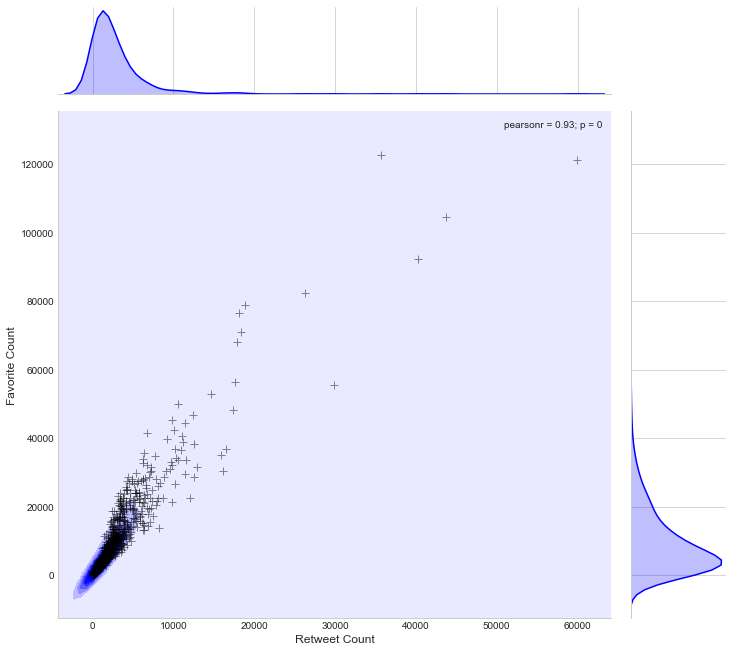

In [118]:
#Visualization comparing the favorite & retweet counts
sns.set_style('whitegrid')
ax = sns.jointplot(x="retweet_count", 
                  y="favorite_count", 
                  data=df_master, 
                  color="blue",
                  kind="kde",
                  size=10)
ax.plot_joint(plt.scatter,  
             c="black",
             s=80, 
             linewidth=1, 
             marker="+",
             alpha=0.45)
ax.set_axis_labels("Retweet Count", "Favorite Count",fontsize=12)

ax.fig.subplots_adjust(top=0.9);



Looks like retweet count and favorite count have a strong positive correlation